# Gas Turbine Emissions Regression

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

## 2. Data Preprocessing and Visualization

### 2.1. Load Data

In [2]:
# Load dataframe (df)
df = pd.read_csv('gt_2011-15.csv')
# Re-order dataframe
# Depdendent variable always on the right (standard convention)
df = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX', 
         'TEY']]

### 2.2. Analyze Data

In [3]:
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP  \
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  11.898   
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  11.892   
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  12.042   
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  11.990   
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...   
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  10.411   
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  10.344   
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  10.462   
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  11.771   
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  11.462   

             CO      NOX     TEY  
0       0.32663   81.952  134.67  
1       0.44784   82.377  134.67  
2       0.45144   83.776  135.10  
3       0.23107   82.505  135.03  
4       0.26747   82.028  134.67  
...         ...      ...     ...  
36728  10.99300   89.172  109.08  
36729  11.14400   88.849  108.79  
36730  11.41400   96.147  107.81  
36731   3.31340   64.738  131.41  
36732  11.98100  109.240  125.41  

[36733 rows x 11 columns]

In [4]:
# Brief info about dataframe - non-null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   CDP     36733 non-null  float64
 8   CO      36733 non-null  float64
 9   NOX     36733 non-null  float64
 10  TEY     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [5]:
# Check for missing values
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

In [6]:
# # -- Drop/impute missing data (if required) --

# # Drop rows with missing values
# df = df.dropna(axis=0, how='any')

# # ['mean', 'median', 'most_frequent', 'constant']
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# imputer.fit_transform(df)
# df = imputer.transform(df)

# df.isnull().sum()

In [7]:
# Dataframe statistics on quantitative (numerical) values
df.describe()

AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           CDP            CO           NOX  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517     12.060525      2.372468     65.293067   
std       17.536373      6.842360      1.088795      2.262672     11.678357   
min     1000.800000    511.040000      9.851800      0.000388     25.905000   
25%     1071.800000    544.720000     11.435000      1.182400     57.162000   
50%     1085.900000    549.880000     11.965000      1.713500     63.849000   
75%     1097.000000    550.040000     12.855000      2.842900     71.548000   
max     1100.900000    550.610000     15.159000     44.103000    119.910000   

                TEY  
count  36733.000000  
mean     133.506404  
std       15.618634  
min      100.020000  
25%      124.450000  
50%      133.730000  
75%      144.080000  
max      179.500000

In [8]:
# Get values for matrix of features (X) and dependent variable (y)
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(36733, 10) (36733,)


### 2.3. Visualize Data

#### Pairwise Relationships between Features

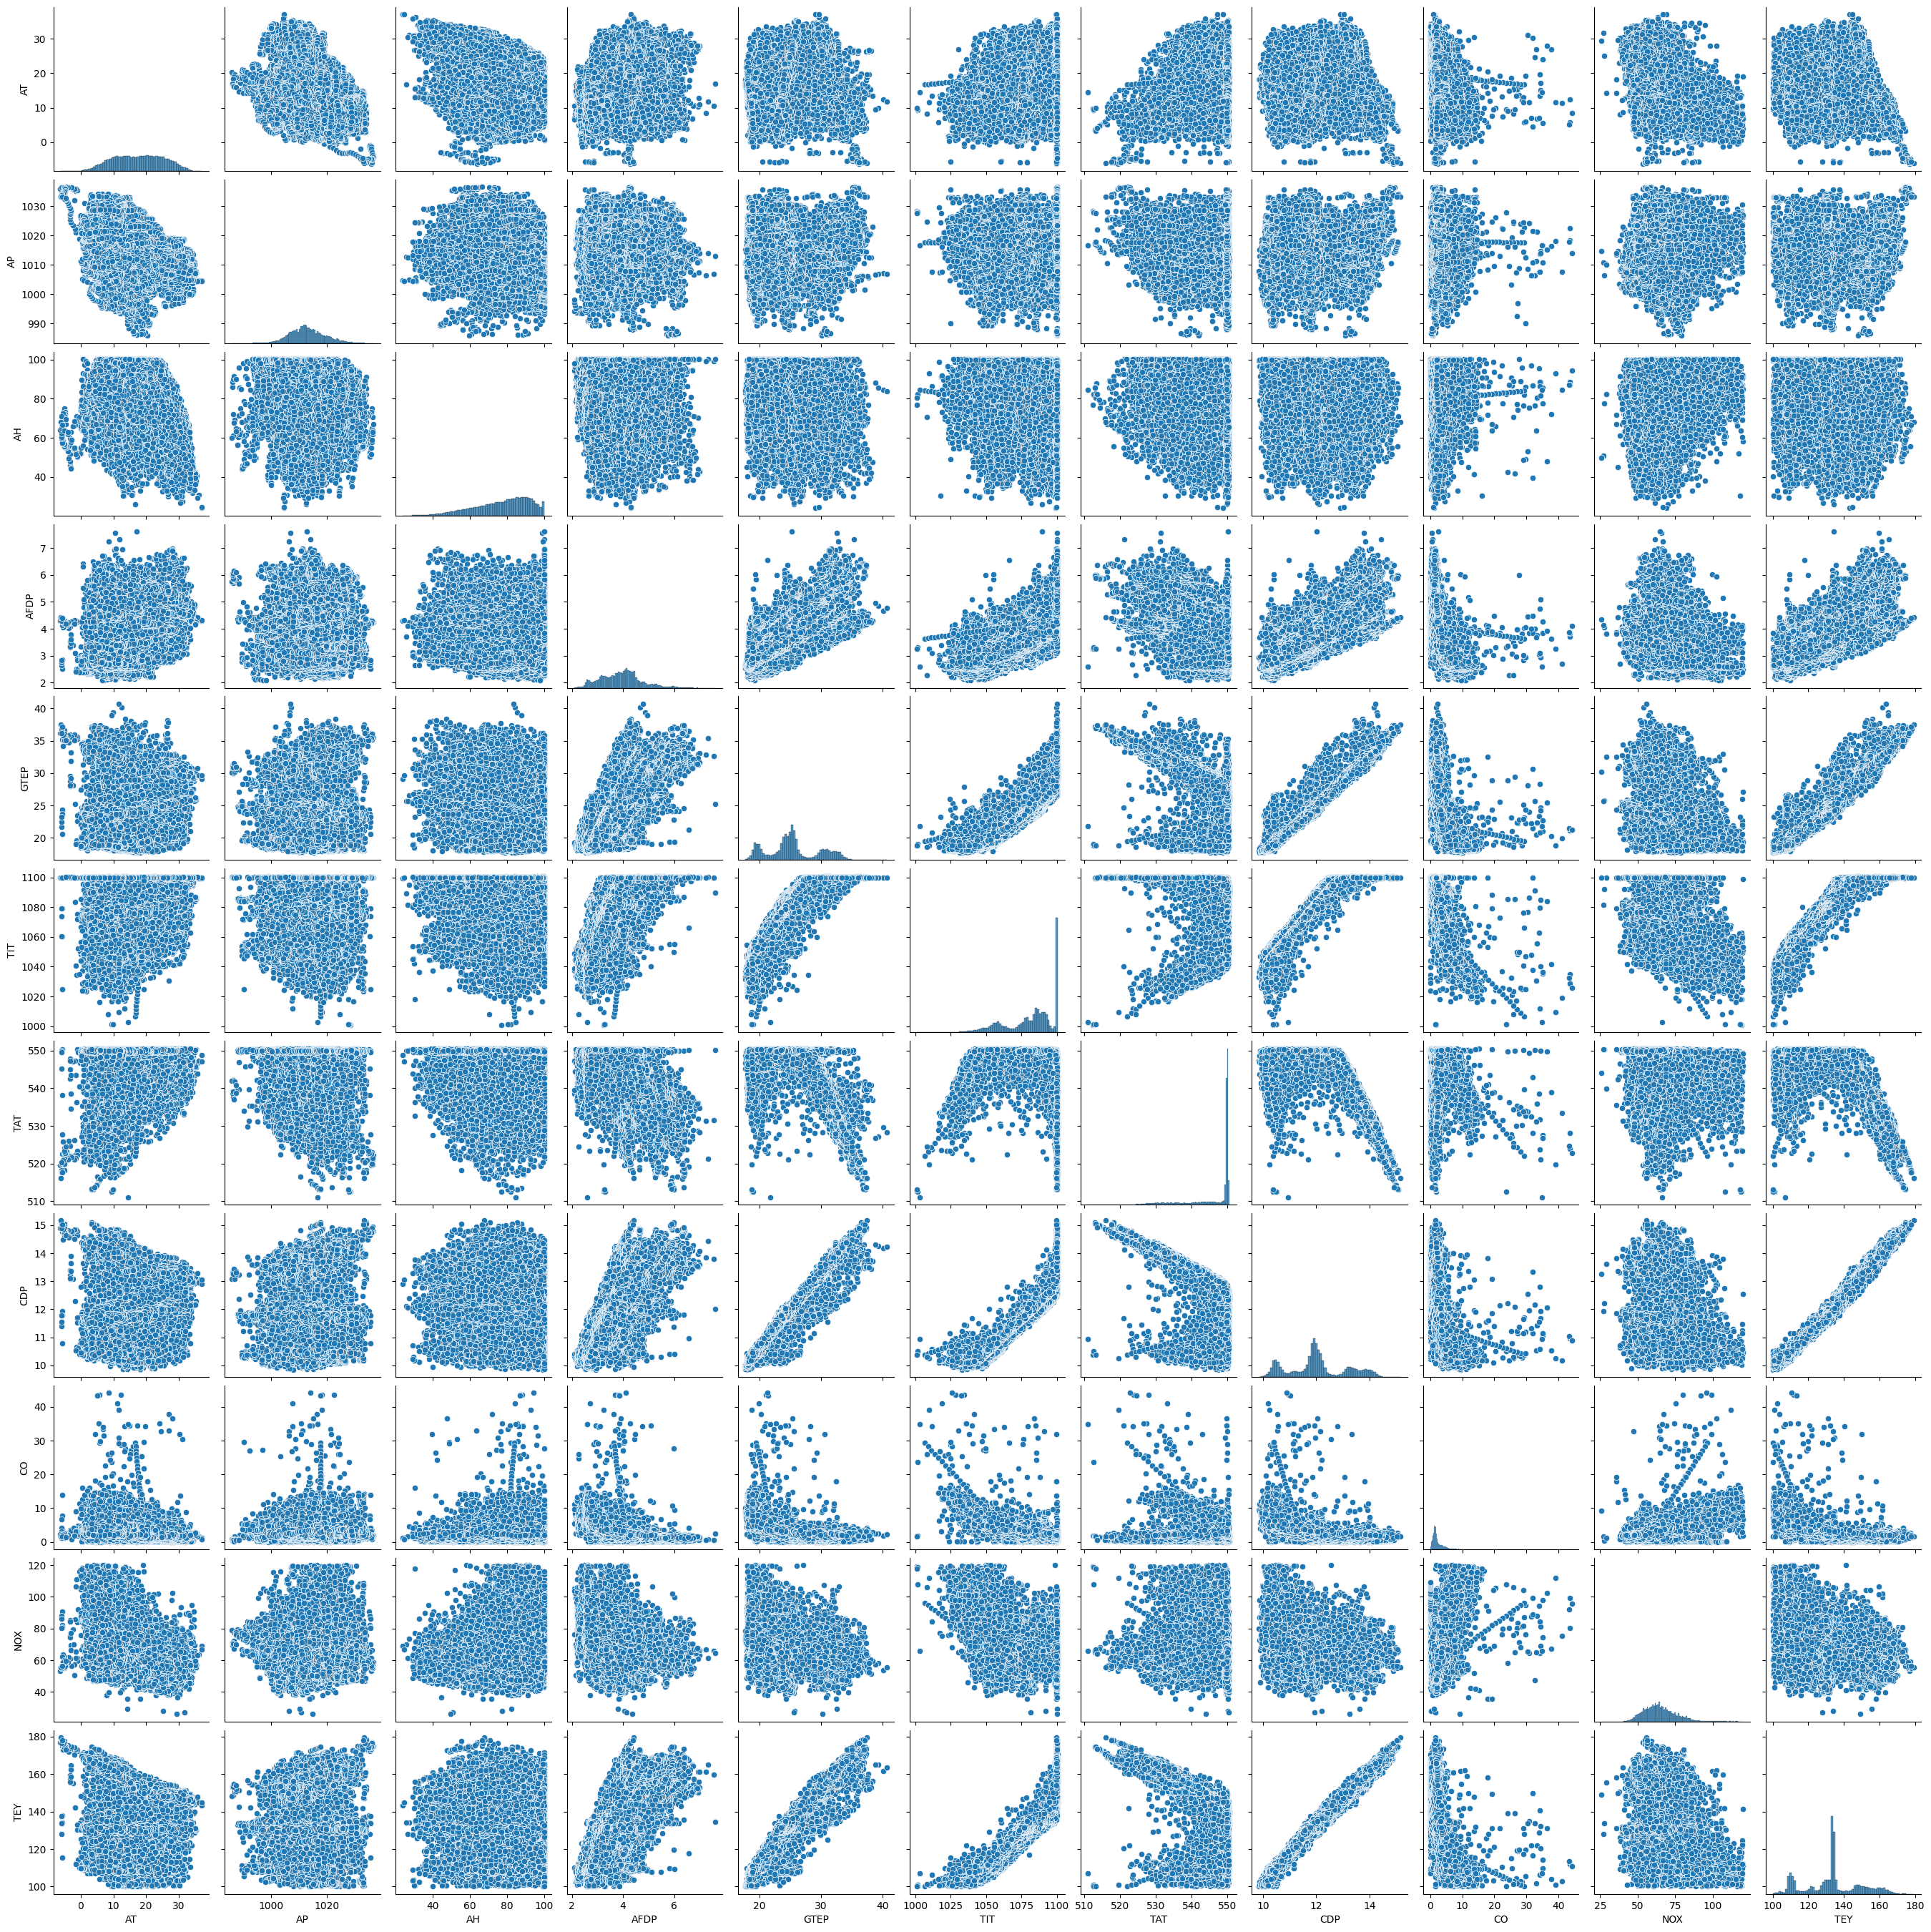

In [9]:
# Pairwise distributions
sns.pairplot(df)

# Show figure
plt.show()

#### Correlation Map

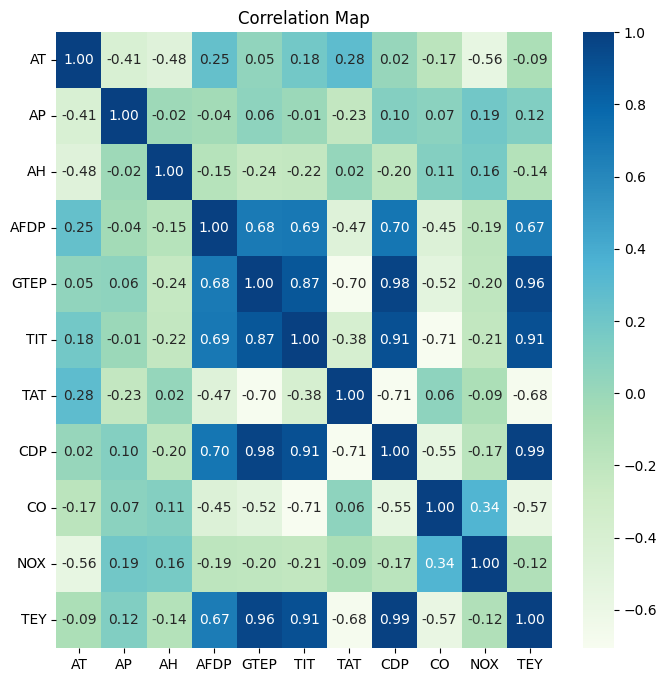

In [10]:
# Define correlation map figure
plt.figure(figsize=(8,8))

# Correlation Map
sns.heatmap(df.corr(), cmap='GnBu', annot=True, fmt = ".2f")
# Adjust axes labels (if required)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
# Figure title
plt.title('Correlation Map')

# Show figure
plt.show()

#### Ambient Temperature Distribution

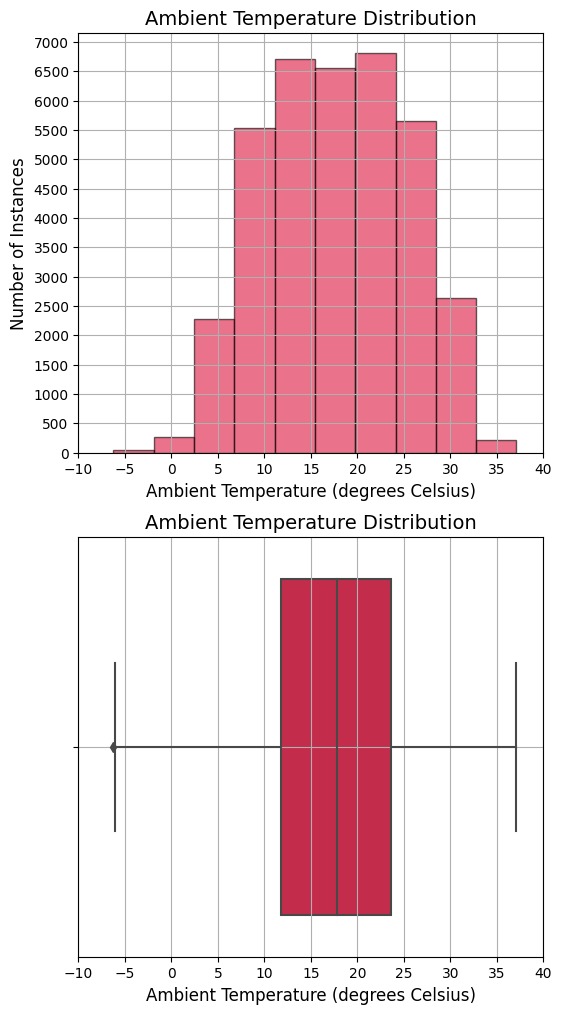

In [11]:
# Define subplot
ambient_temp = plt.figure(figsize=(6, 12))

# Histogram
ax1 = ambient_temp.add_subplot(2, 1, 1)
ax1 = plt.hist(x=df['AT'], alpha=0.6, color='crimson', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(-10, 45, 5))
plt.yticks(np.arange(0, 7500, 500))
# Plot title and labels
plt.xlabel('Ambient Temperature (degrees Celsius)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Ambient Temperature Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Box Plot
ax2 = ambient_temp.add_subplot(2, 1, 2)
ax2 = sns.boxplot(x=df['AT'], color='crimson')
# Adjust X-Axis range
plt.xticks(np.arange(-10, 45, 5))
# Plot title and X-Axis label
plt.xlabel('Ambient Temperature (degrees Celsius)', fontsize=12)
plt.title('Ambient Temperature Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Show subplot
plt.show()

#### Ambient Pressure Distribution

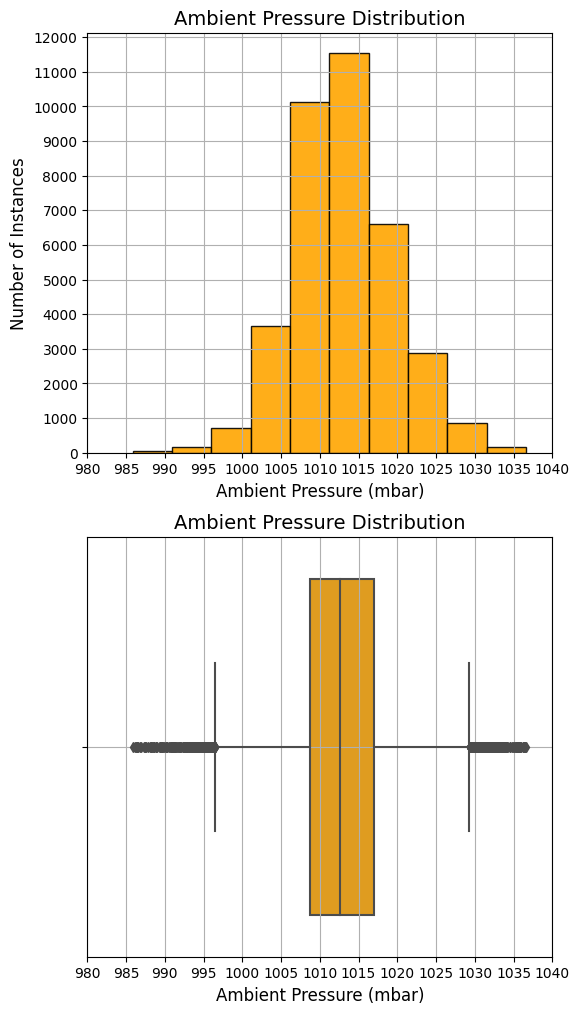

In [12]:
# Define subplot
ambient_pressure = plt.figure(figsize=(6, 12))

# Histogram
ax1 = ambient_pressure.add_subplot(2, 1, 1)
ax1 = plt.hist(x=df['AP'], alpha=0.9, color='orange', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(980, 1045, 5))
plt.yticks(np.arange(0, 13000, 1000))
# Plot title and labels
plt.xlabel('Ambient Pressure (mbar)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Ambient Pressure Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Box Plot
ax2 = ambient_pressure.add_subplot(2, 1, 2)
ax2 = sns.boxplot(x=df['AP'], color='orange')
# Adjust X-Axis range
plt.xticks(np.arange(980, 1045, 5))
# Plot title and X-Axis label
plt.xlabel('Ambient Pressure (mbar)', fontsize=12)
plt.title('Ambient Pressure Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Show plot
plt.show()

#### Ambient Temperature vs. Ambient Pressure

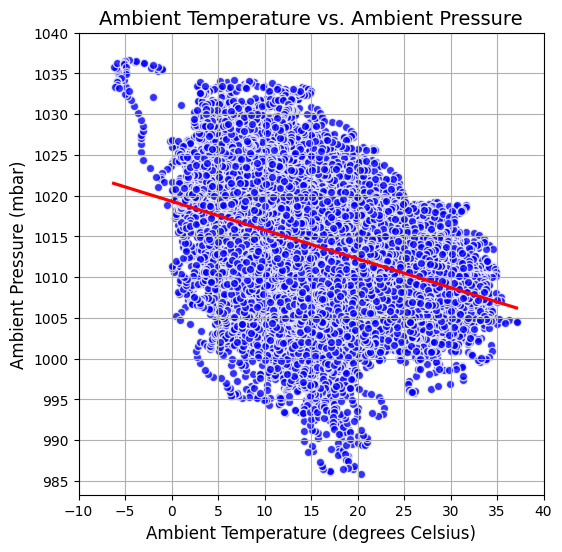

In [13]:
# Define figure
plt.figure(figsize=(6, 6))

# Scatter plot with average line of best-fit (LOBF)
sns.regplot(x=df['AT'], y=df['AP'], order=1, 
            scatter_kws={"color": "blue", 'edgecolors': "whitesmoke"}, 
            line_kws={"color": "red"})
# Adjust axes ranges
plt.xticks(np.arange(-10, 45, 5))
plt.yticks(np.arange(985, 1045, 5))
# Plot title and labels
plt.xlabel('Ambient Temperature (degrees Celsius)', fontsize=12)
plt.ylabel('Ambient Pressure (mbar)', fontsize=12)
plt.title('Ambient Temperature vs. Ambient Pressure', fontsize=14)
# Plot grid
plt.grid(True)

# Show plot
plt.show()

#### Turbine Energy Yield Distribution (dependent variable)

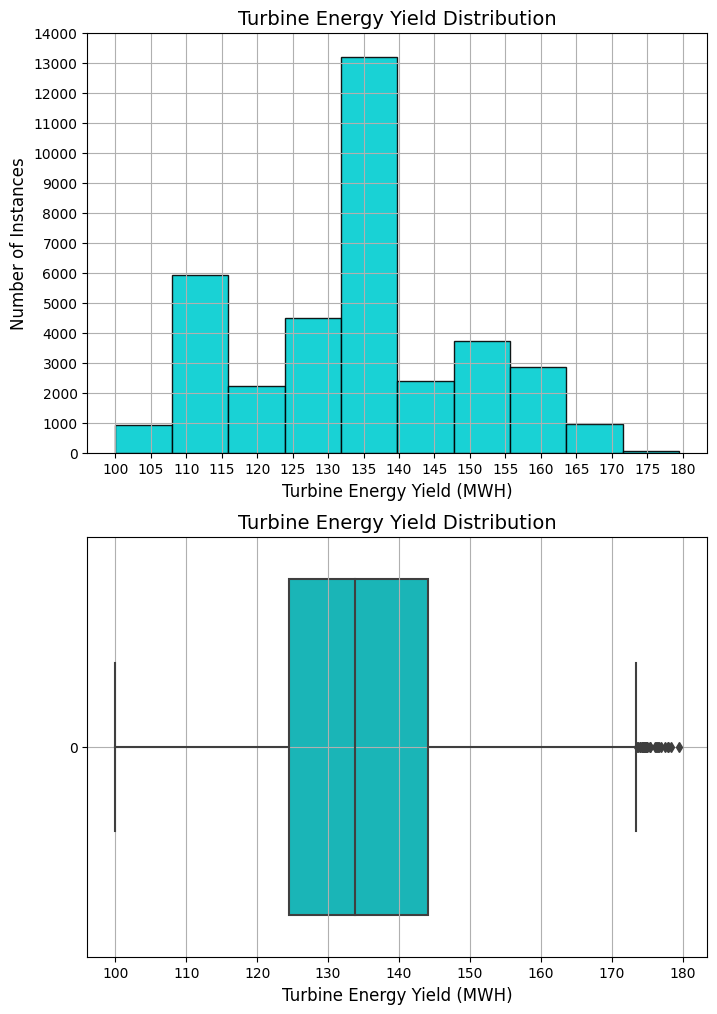

In [14]:
# Define subplot
tey = plt.figure(figsize=(8, 12))

# Histogram
ax1 = tey.add_subplot(2, 1, 1)
ax1 = plt.hist(x=df['TEY'], alpha=0.9, color='darkturquoise', edgecolor='black')
# Adjust axes ranges
plt.xticks(np.arange(100, 185, 5))
plt.yticks(np.arange(0, 15000, 1000))
# Plot title and labels
plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.title('Turbine Energy Yield Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Box Plot
ax2 = tey.add_subplot(2, 1, 2)
ax2 = sns.boxplot(df['TEY'], color='darkturquoise', orient='horizontal')
# Adjust X-Axis range
# plt.xticks(np.arange(100, 185, 5))
# Plot title and X-Axis label
plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.title('Turbine Energy Yield Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Show subplot
plt.show()

#### Compressor Discharge Pressure vs Turbine Energy Yield

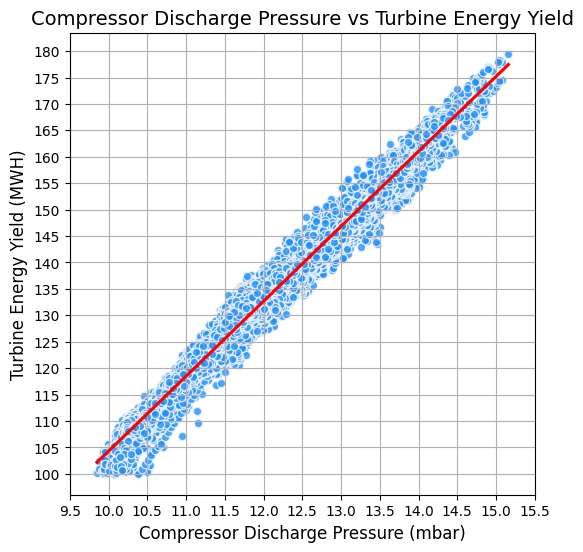

In [15]:
# Define figure
plt.figure(figsize=(6, 6))

# Scatter plot with average line of best-fit (LOBF)
sns.regplot(x=df['CDP'], y=df['TEY'], order=1, 
            scatter_kws={"color": "dodgerblue", 'edgecolors': "whitesmoke"}, 
            line_kws={"color": "red"})
# Adjust axes ranges
plt.xticks(np.arange(9.5, 16, .5))
plt.yticks(np.arange(100, 185, 5))
# Plot title and labels
plt.xlabel('Compressor Discharge Pressure (mbar)', fontsize=12)
plt.ylabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.title('Compressor Discharge Pressure vs Turbine Energy Yield', fontsize=14)
# Plot grid
plt.grid()

# Show plot
plt.show()

#### Turbine Energy Yield vs. Carbon Monoxide

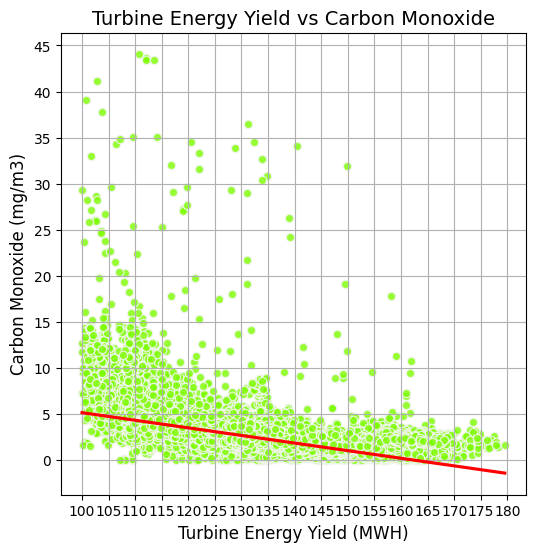

In [16]:
# Define figure
plt.figure(figsize=(6, 6))

# Scatter plot with average line of best-fit (LOBF)
sns.regplot(x=df['TEY'], y=df['CO'], order=1, 
            scatter_kws={"color": "lawngreen", 'edgecolors': "whitesmoke"}, 
            line_kws={"color": "red"})
# Adjust axes ranges
plt.xticks(np.arange(100, 185, 5))
plt.yticks(np.arange(0, 50, 5))
# Plot title and labels
plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.ylabel('Carbon Monoxide (mg/m3)', fontsize=12)
plt.title('Turbine Energy Yield vs Carbon Monoxide', fontsize=14)
# Plot grid
plt.grid()

# Show plot
plt.show()

### 2.4. Feature Engineering

In [17]:
# Split dataframe (df) into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [18]:
# Feature scaling - Standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 3. Define and Evaluate Models

In [19]:
# Linear Regression (LR)
from sklearn.linear_model import LinearRegression
# Support Vector Machine - Regression (SVR)
from sklearn.svm import SVR
# Decision Tree (DT)
from sklearn.tree import DecisionTreeRegressor
# Random Forest (RF)
from sklearn.ensemble import RandomForestRegressor
# XGBoost (XGB)
import xgboost as xgb
from xgboost import XGBRegressor
# LightGBM (LGB)
import lightgbm as lgb
from lightgbm import LGBMRegressor
# Deep Neural Network (DNN)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Additional Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#### **Set Scoring Metric**

In [20]:
# -- R^2 Score --
metric = 'r2'

# -- Root Mean Squared Error (RMSE) --
# metric = 'rmse'

#### **Important Functions**

In [21]:
# Summarize prediction results
def summarize_results(model):
  """
  model - Summarize results for Machine Learning model
  """

  # Mean Absolute Error (MAE)
  print('MAE: %.3f' % (mean_absolute_error(y_test, model)))
  # Mean Squared Error (MSE)
  print('MSE: %.3f' % (mean_squared_error(y_test, model)))
  # Root Mean Squared Error (RMSE)
  print('RMSE: %.3f' % (mean_squared_error(y_test, model, squared=False)))
  # R^2 Score (Goodness-of-Fit)
  print('R^2 Score: %.3f' % (r2_score(y_test, model)))

In [22]:
# Plot prediction and validation distributions
def plot_dist(model, colour, a, x_range, y_range):
  """
  model   - Machine Learning model implemented
  colour  - Colour for predictions
  a       - Colour adjustment for predictions (alpha)
  x_range - X-Axis range of values
  y_range - Y-Axis range of values
  """
  
  # Define subplot figure
  fig = plt.figure(figsize=(15, 12))

  # Histogram for predicted model
  ax1 = fig.add_subplot(2, 2, 1)
  ax1 = plt.hist(x=model, facecolor=colour, alpha=a, edgecolor='black')
  # Adjust axes range(s)
  plt.xticks(x_range)
  plt.yticks(y_range)
  # Plot title and label(s)
  plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
  plt.ylabel('Number of Instances', fontsize=12)
  plt.title('Predicted Turbine Energy Yield', fontsize=14)
  # Plot grid
  plt.grid(True)

  # Histogram for y_test
  ax2 = fig.add_subplot(2, 2, 2)
  ax2 = plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
  # Adjust axes range(s)
  plt.xticks(x_range)
  plt.yticks(y_range)
  # Plot title and label(s)
  plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
  plt.ylabel('Number of Instances', fontsize=12)
  plt.title('Validation Turbine Energy Yield', fontsize=14)
  # Plot grid
  plt.grid(True)

  # Box plot for predicted model
  ax3 = fig.add_subplot(2, 2, 3)
  ax3 = sns.boxplot(x=model, color=colour)
  # Adjust axes range(s)
  plt.xticks(x_range)
  # Plot title and label(s)
  plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
  plt.title('Predicted Turbine Energy Yield', fontsize=14)
  # Plot grid
  plt.grid(True)

  # Box plot for y_test
  ax4 = fig.add_subplot(2, 2, 4)
  ax4 = sns.boxplot(x=y_test, color='orange')
  # Adjust axes range(s)
  plt.xticks(x_range)
  # Plot title and label(s)
  plt.xlabel('Turbine Energy Yield (MWH)', fontsize=12)
  plt.title('Validation Turbine Energy Yield', fontsize=14)
  # Plot grid
  plt.grid(True)

  # Return figure to show
  return fig

In [23]:
# Apply k-Fold Cross Validation on the training set
def k_fold(model, n=10):
  """
  model - Machine Learning model implemented
  n     - number of k-Folds (default 10)
  """
  
  # Lists of values
  r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
  rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
  # Cross validate for n k-folds (RepeatedKFold - no repeats)
  for i in range(2, 2+n):
    cv = RepeatedKFold(n_splits = i, random_state = 0)
    # Collect appropriate Key Performance Indicator (KPI) results per k-Fold
    r2_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
    # mae_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # mse_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    rmse_scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    
    # Force scores to be positive
    r2_scores = abs(r2_scores)
    rmse_scores = abs(rmse_scores)

    # Print R^2 scores
    print('')
    print('-- Fold: %d --' % (i-1))
    print('')
    print('R^2 Scoring:')
    print("Mean: %f" % (np.mean(r2_scores)))
    print("Std: +/- %f" % (np.std(r2_scores)))
    print("Min: %f" % (np.min(r2_scores)))
    print("Max: %f" % (np.max(r2_scores)))
    
    # Print RMSE scores
    print('')
    print('RMSE Scoring:')
    print("Mean: %f" % (np.mean(rmse_scores)))
    print("Std: +/- %f" % (np.std(rmse_scores)))
    print("Min: %f" % (np.min(rmse_scores)))
    print("Max: %f" % (np.max(rmse_scores)))
    print('')
    
    # Append R^2 scores
    r2_means.append(np.mean(r2_scores))
    r2_stds.append(np.std(r2_scores))
    r2_mins.append(np.min(r2_scores))
    r2_maxs.append(np.max(r2_scores))

    # Append RMSE scores
    rmse_means.append(np.mean(rmse_scores))
    rmse_stds.append(np.std(rmse_scores))
    rmse_mins.append(np.min(rmse_scores))
    rmse_maxs.append(np.max(rmse_scores))

  # Define subplot figure
  k_fold_results = plt.figure(figsize=(15, 10))

  # Plot R^2 scores per k-fold:
  ax1 = k_fold_results.add_subplot(2, 2, 1)
  ax1.plot(np.arange(1,1+n), r2_means, color='red', label='Mean')
  ax1.plot(np.arange(1,1+n), r2_mins, color='green', label='Min')
  ax1.plot(np.arange(1,1+n), r2_maxs, color='blue', label='Max')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax1.set_xlabel('k-Fold', fontsize=12)
  ax1.set_ylabel('R^2 Score', fontsize=12)
  ax1.set_title('R^2 Score per k-Fold', fontsize=14)
  # Legend and grid
  ax1.legend()
  ax1.grid(True)

  # Plot R^2 Standard Deviations per k-fold:
  ax2 = k_fold_results.add_subplot(2, 2, 2)
  ax2.plot(np.arange(1,1+n), r2_stds, color='red')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax2.set_xlabel('k-Fold', fontsize=12)
  ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
  ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
  # Set grid
  ax2.grid(True)

  # Plot RMSE scores per k-fold:
  ax3 = k_fold_results.add_subplot(2, 2, 3)
  ax3.plot(np.arange(1,1+n), rmse_means, color='orangered', label='Mean')
  ax3.plot(np.arange(1,1+n), rmse_mins, color='green', label='Min')
  ax3.plot(np.arange(1,1+n), rmse_maxs, color='blue', label='Max')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax3.set_xlabel('k-Fold', fontsize=12)
  ax3.set_ylabel('RMSE Score', fontsize=12)
  ax3.set_title('RMSE Score per k-Fold', fontsize=14)
  # Legend and grid
  ax3.legend()
  ax3.grid(True)

  # Plot RMSE Standard Deviations per k-fold:
  ax4 = k_fold_results.add_subplot(2, 2, 4)
  ax4.plot(np.arange(1,1+n), rmse_stds, color='orangered')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax4.set_xlabel('k-Fold', fontsize=12)
  ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
  ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
  # Set grid
  ax4.grid(True)

  # Show subplot
  plt.show()

  # Return cv for Grid Searching hyperparameter tuning (optimization)
  return cv

### Linear Regression (LR)

In [24]:
# Define LR model
lr_reg = LinearRegression()

# Train LR model
lr_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict test set results
lr_pred = lr_reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((lr_pred.reshape(len(lr_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Summarize results
summarize_results(lr_pred)

[[126.35 126.81]
 [121.81 122.67]
 [150.71 152.8 ]
 ...
 [132.16 132.22]
 [133.79 132.83]
 [149.12 150.23]]

MAE: 0.778
MSE: 1.000
RMSE: 1.000
R^2 Score: 0.996


<table border = "1">
  <thead>
    <th colspan = "5">Linear Regression Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.778</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>1.000</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>1.000</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.996</td>
    </tr>
  </tbody>
</table>

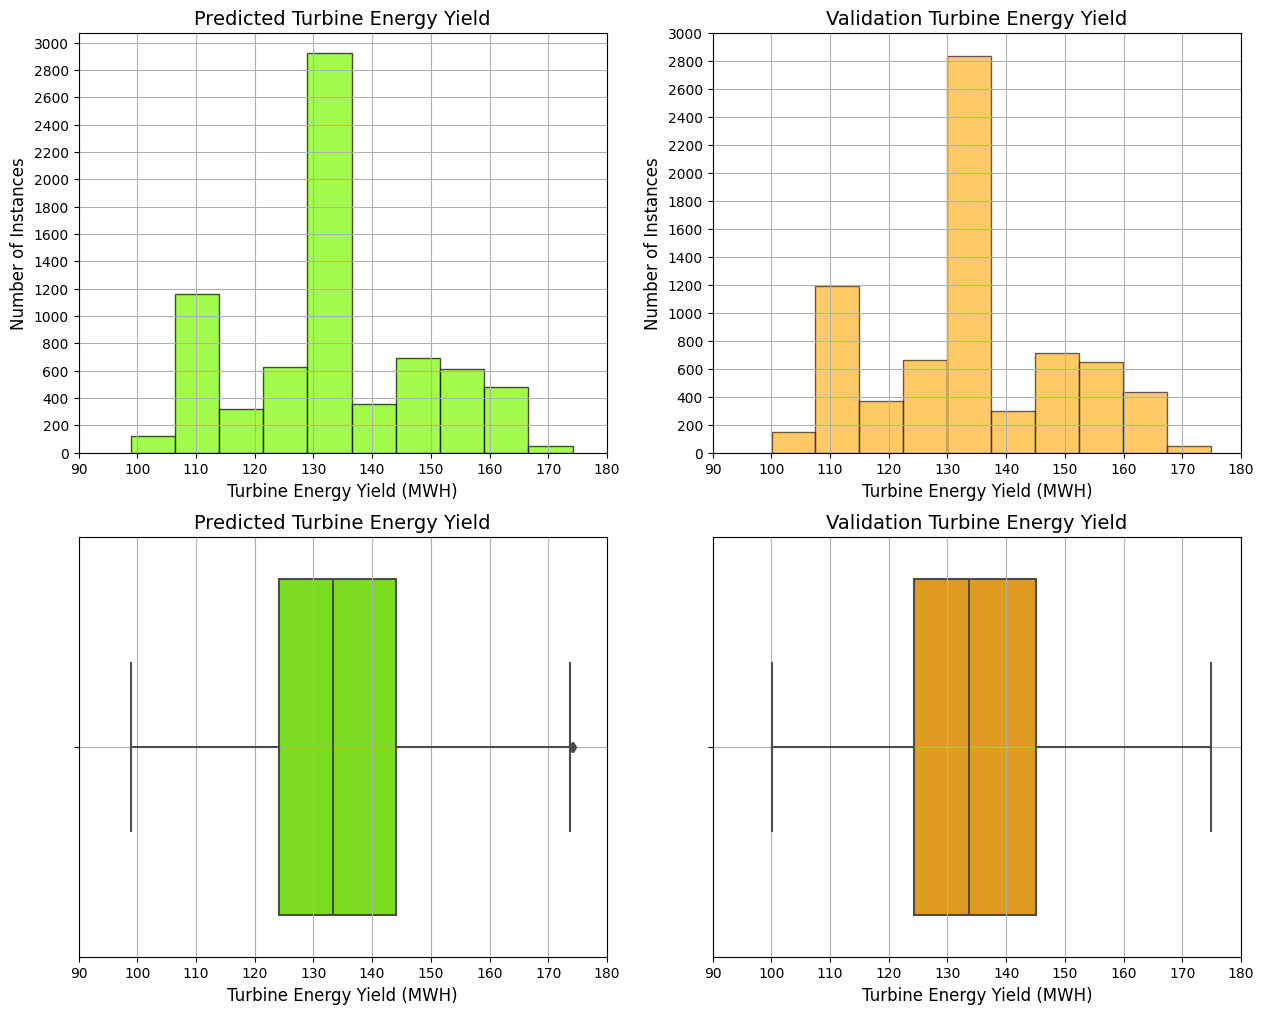

In [26]:
# Display LR prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
lr_dist = plot_dist(lr_pred, 'lawngreen', 0.7, np.arange(90, 190, 10), 
                    np.arange(0, 3200, 200))

# Show subplot
plt.show()


-- Fold: 1 --

R^2 Scoring:
Mean: 0.996262
Std: +/- 0.000029
Min: 0.996218
Max: 0.996310

RMSE Scoring:
Mean: 0.952213
Std: +/- 0.002375
Min: 0.946284
Max: 0.959027


-- Fold: 2 --

R^2 Scoring:
Mean: 0.996262
Std: +/- 0.000053
Min: 0.996155
Max: 0.996400

RMSE Scoring:
Mean: 0.952154
Std: +/- 0.005547
Min: 0.938573
Max: 0.963237


-- Fold: 3 --

R^2 Scoring:
Mean: 0.996262
Std: +/- 0.000060
Min: 0.996137
Max: 0.996407

RMSE Scoring:
Mean: 0.952132
Std: +/- 0.005477
Min: 0.941288
Max: 0.964618


-- Fold: 4 --

R^2 Scoring:
Mean: 0.996262
Std: +/- 0.000062
Min: 0.996128
Max: 0.996363

RMSE Scoring:
Mean: 0.952118
Std: +/- 0.005988
Min: 0.937296
Max: 0.968137


-- Fold: 5 --

R^2 Scoring:
Mean: 0.996261
Std: +/- 0.000095
Min: 0.996042
Max: 0.996466

RMSE Scoring:
Mean: 0.952097
Std: +/- 0.010064
Min: 0.928679
Max: 0.974792


-- Fold: 6 --

R^2 Scoring:
Mean: 0.996261
Std: +/- 0.000097
Min: 0.996000
Max: 0.996482

RMSE Scoring:
Mean: 0.952081
Std: +/- 0.010154
Min: 0.924502
Max: 0.974278

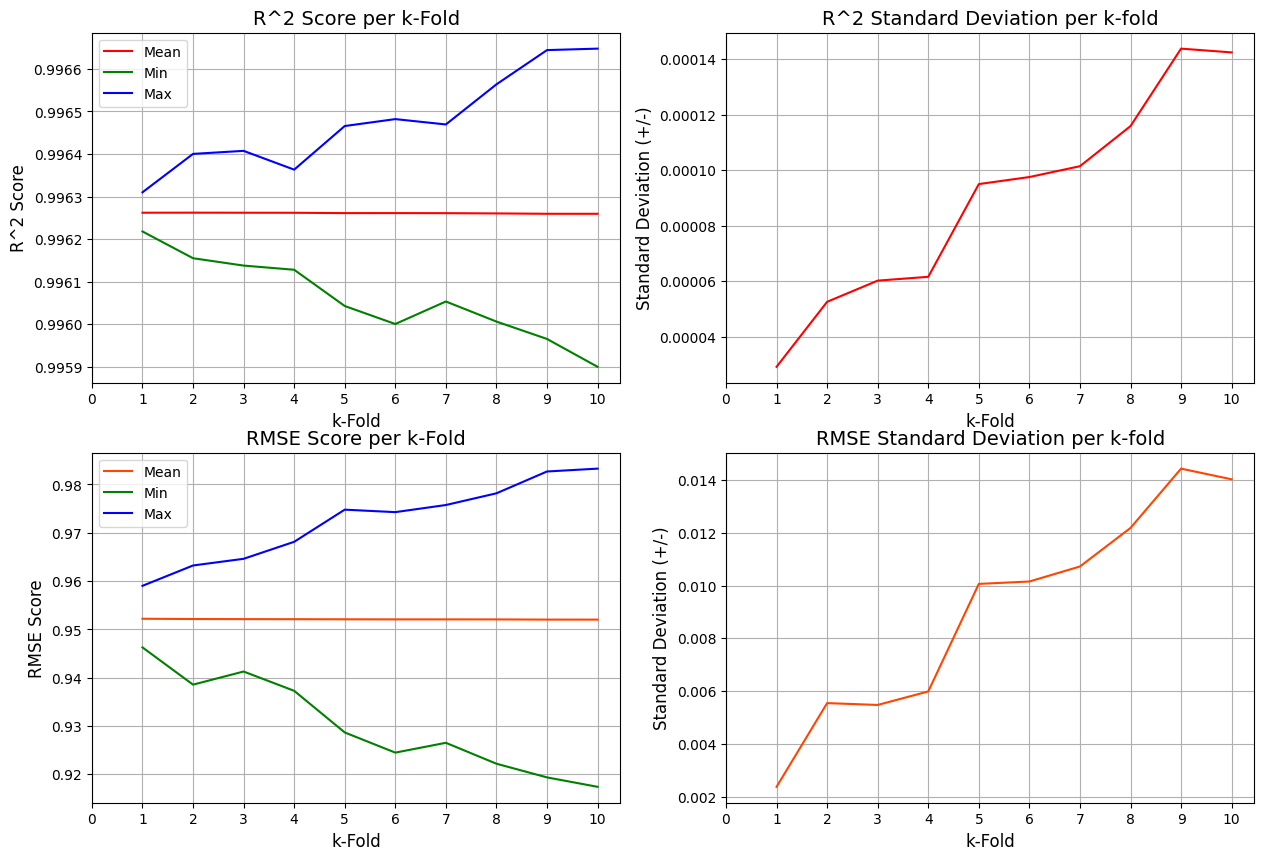

In [27]:
# Linear Regression - k-Fold Cross Validation
lr_cv = k_fold(lr_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Linear Regression Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.996</td>
      <td>0.952</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.0001</td>
      <td>0.014</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.996</td>
      <td>0.917</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.997</td>
      <td>0.983</td>
    </tr>
  </tbody>
</table>

### Decision Tree (DT)

In [28]:
# Define DT model
# dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg = DecisionTreeRegressor(criterion='squared_error', max_depth=17, random_state=0)

# Train DT model
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=17, random_state=0)

In [29]:
# Predict test set results
dt_pred = dt_reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((dt_pred.reshape(len(dt_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Summarize results
summarize_results(dt_pred)

[[127.36 126.81]
 [122.9  122.67]
 [151.63 152.8 ]
 ...
 [130.11 132.22]
 [133.83 132.83]
 [150.45 150.23]]

MAE: 0.673
MSE: 0.915
RMSE: 0.956
R^2 Score: 0.996


<table border = "1">
  <thead>
    <th colspan = "5">Decision Tree Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.673</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>0.915</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>0.956</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.996</td>
    </tr>
  </tbody>
</table>

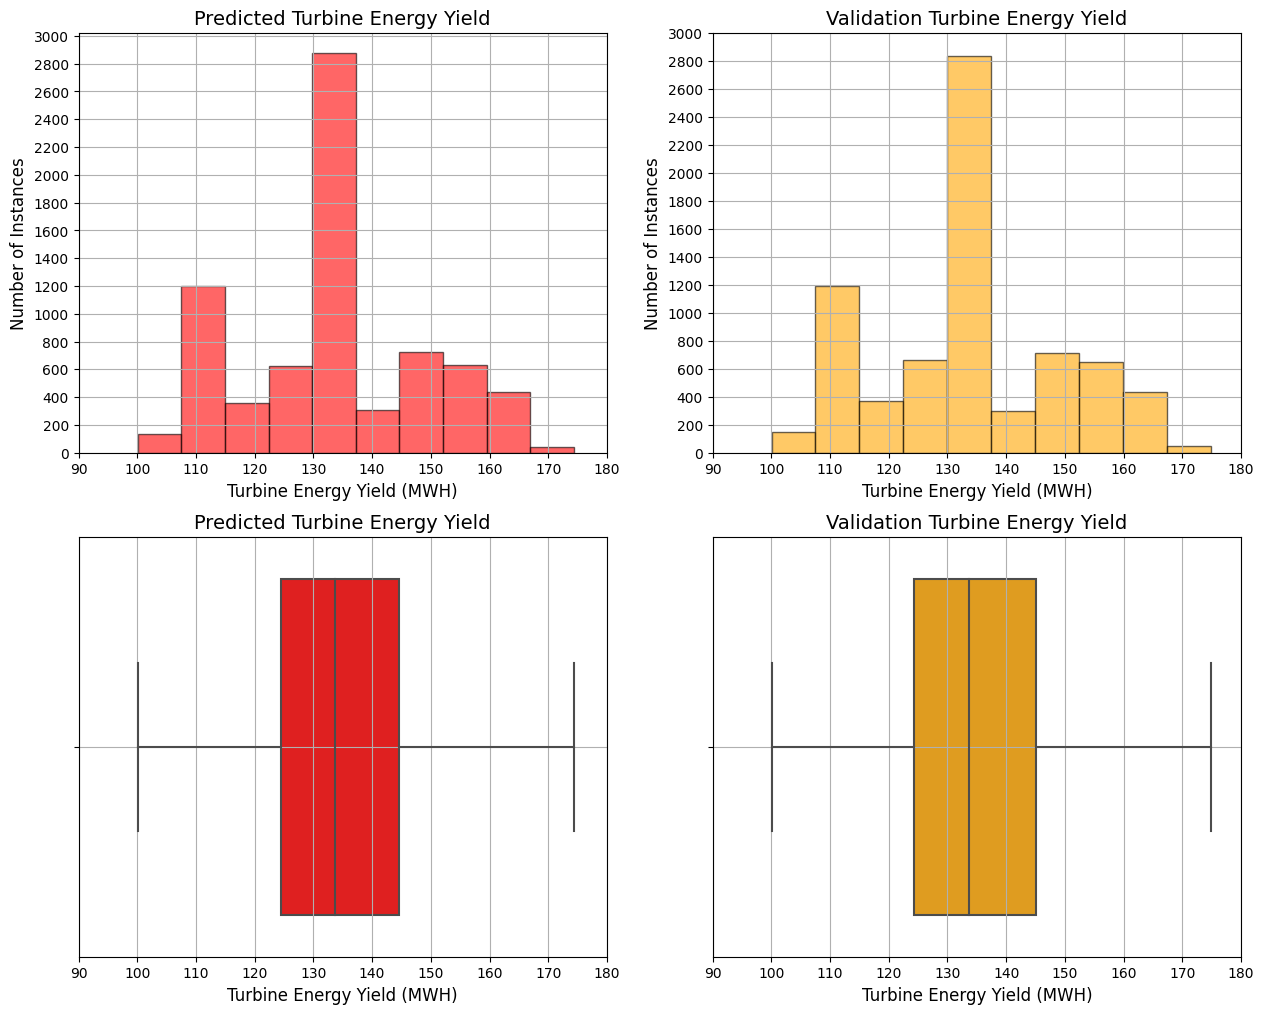

In [30]:
# Display Decision Tree prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
dt_dist = plot_dist(dt_pred, 'red', 0.6, np.arange(90, 190, 10), 
                    np.arange(0, 3200, 200))

# Show subplot
plt.show()


-- Fold: 1 --

R^2 Scoring:
Mean: 0.995629
Std: +/- 0.000142
Min: 0.995377
Max: 0.995886

RMSE Scoring:
Mean: 1.029526
Std: +/- 0.016096
Min: 0.996243
Max: 1.052202


-- Fold: 2 --

R^2 Scoring:
Mean: 0.996005
Std: +/- 0.000093
Min: 0.995784
Max: 0.996213

RMSE Scoring:
Mean: 0.984290
Std: +/- 0.010807
Min: 0.967016
Max: 1.010355


-- Fold: 3 --

R^2 Scoring:
Mean: 0.996137
Std: +/- 0.000133
Min: 0.995725
Max: 0.996358

RMSE Scoring:
Mean: 0.967830
Std: +/- 0.017639
Min: 0.937207
Max: 1.019021


-- Fold: 4 --

R^2 Scoring:
Mean: 0.996224
Std: +/- 0.000140
Min: 0.995946
Max: 0.996562

RMSE Scoring:
Mean: 0.956720
Std: +/- 0.017096
Min: 0.912983
Max: 0.995803


-- Fold: 5 --

R^2 Scoring:
Mean: 0.996291
Std: +/- 0.000144
Min: 0.995967
Max: 0.996549

RMSE Scoring:
Mean: 0.948200
Std: +/- 0.017492
Min: 0.913968
Max: 0.989401


-- Fold: 6 --

R^2 Scoring:
Mean: 0.996291
Std: +/- 0.000170
Min: 0.995936
Max: 0.996639

RMSE Scoring:
Mean: 0.948131
Std: +/- 0.021536
Min: 0.914822
Max: 0.996212

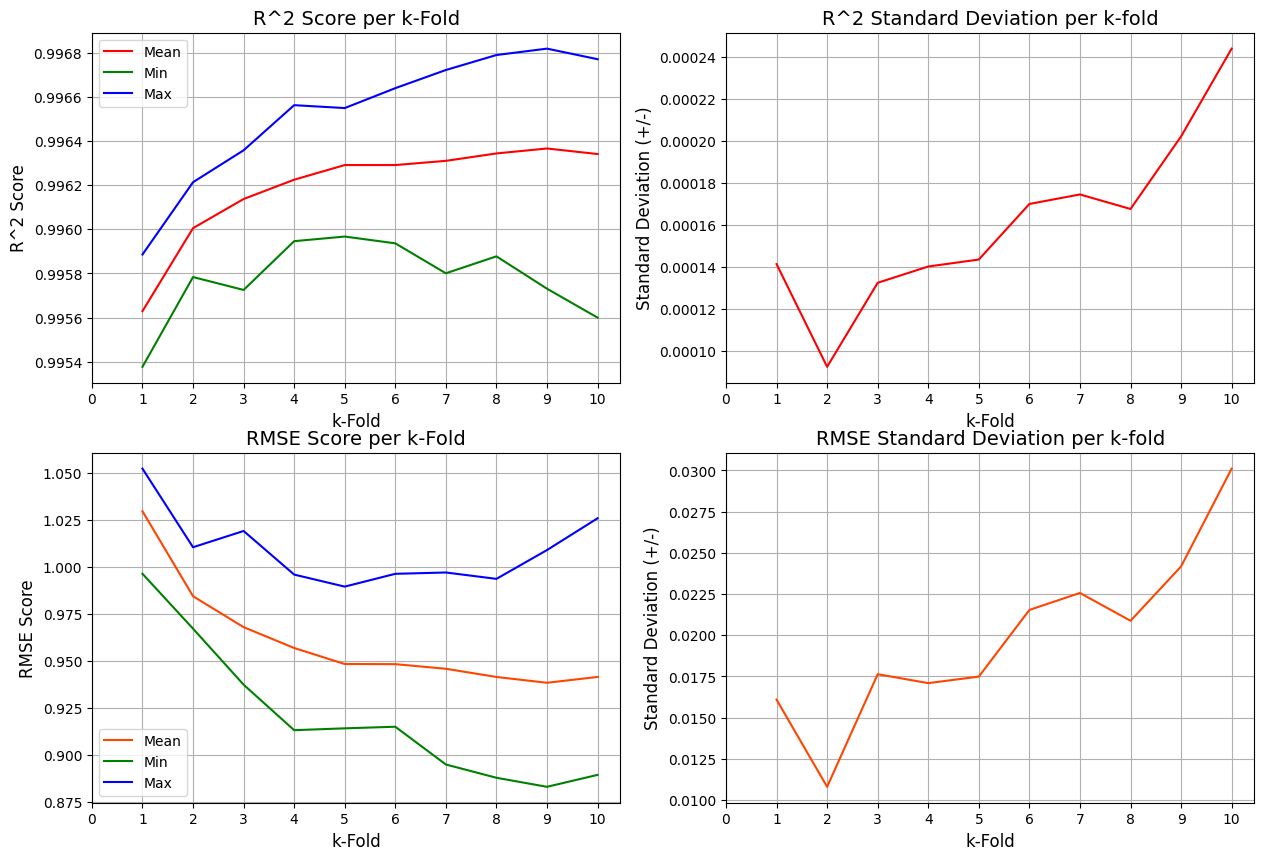

In [31]:
# Decision Tree - k-Fold Cross Validation
dt_cv = k_fold(dt_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Decision Tree Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.996</td>
      <td>0.941</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.0002</td>
      <td>0.030</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.996</td>
      <td>0.890</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.997</td>
      <td>1.026</td>
    </tr>
  </tbody>
</table>

In [32]:
# Apply Grid Search for parameter tuning

# dt_params = {'criterion': ['mse', 'mae'],
#              'max_depth': [5, 10, 15, 20, 25, 50],
#              'min_samples_leaf': [2, 5, 8, 10],
#              'min_samples_split': [2, 5, 8, 10],
#              'max_features': [2, 5, 10, 15, 20, 25],
#              'random_state': [0, 1, 2, 42]}

# dt_params = {'max_depth': [18],
#              'random_state': [0]}

dt_params = {'criterion': ['squared_error'],
             'max_depth': [17],
             'random_state': [0]}

# Perform Grid Search
if ((metric == "r2") or (metric == "rmse")):
  # R^2 Score
  dt_grid_r2 = GridSearchCV(dt_reg, dt_params, scoring='r2', 
                              cv=dt_cv, n_jobs=-1)
  results_r2 = dt_grid_r2.fit(X_train, y_train)
  # RMSE
  dt_grid_rmse = GridSearchCV(dt_reg, dt_params, 
                                scoring='neg_root_mean_squared_error', 
                                cv=dt_cv, n_jobs=-1)
  results_rmse = dt_grid_rmse.fit(X_train, y_train)

  # Summarize results
  best_r2 = dt_grid_r2.best_score_
  best_rmse = np.abs(dt_grid_rmse.best_score_)
  # Best scores
  print("Best R^2 Score: %.3f%%" % (best_r2 * 100))
  print("Best RMSE: %.3f" % (best_rmse))

  # Best parameters
  if (metric == "r2"):
    # R^2 Score
    best_parameters = dt_grid_r2.best_params_
    print("Best Parameters (R^2): ", best_parameters)
  elif (metric == "rmse"):
    # RMSE
    best_parameters = dt_grid_rmse.best_params_
    print("Best Parameters (RMSE): ", best_parameters)
else:
  # Invalid metric
  print("Invalid scoring metric!")

# # dt_grid = GridSearchCV(dt_reg, dt_params, scoring='neg_mean_absolute_error', cv=dt_cv, n_jobs=-1)
# # dt_grid = GridSearchCV(dt_reg, dt_params, scoring='neg_mean_squared_error', cv=dt_cv, n_jobs=-1)
# # dt_grid = GridSearchCV(dt_reg, dt_params, scoring='neg_root_mean_squared_error', cv=dt_cv, n_jobs=-1)
# dt_grid = GridSearchCV(dt_reg, dt_params, scoring='r2', cv=dt_cv, n_jobs=-1)
# results = dt_grid.fit(X_train, y_train)

# # Summarize results
# best_score = dt_grid.best_score_
# best_parameters = dt_grid.best_params_
# print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R^2 Scoring
# # print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
# print("Best Parameters: ", best_parameters)

Best R^2 Score: 99.634%
Best RMSE: 0.941
Best Parameters (R^2):  {'criterion': 'squared_error', 'max_depth': 17, 'random_state': 0}


<table border = "1">
  <thead>
    <th colspan = "2">Decision Tree Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td colspan = "2"><b>Best Score</b></td>
    </tr>
    <tr>
      <td><b>R^2</b></td>
      <td>99.634%</td>
    </tr>
    <tr>
      <td><b>RMSE</b></td>
      <td>0.941</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>criterion</b></td>
      <td>'squared_error'</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>17</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

### LightGBM (LGB)

In [33]:
# Define LGB model
lgb_reg = LGBMRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, 
                        random_state=0)
# lgb_reg = LGBMRegressor(max_depth=19, n_estimators=100, learning_rate=0.1, 
#                         reg_alpha=0.5, reg_lambda=0.45, random_state=0)

# Train LGB model
lgb_reg.fit(X_train, y_train)

LGBMRegressor(max_depth=10, random_state=0)

In [34]:
# Predict test set results
lgb_pred = lgb_reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((lgb_pred.reshape(len(lgb_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Summarize results
summarize_results(lgb_pred)

[[126.79 126.81]
 [121.99 122.67]
 [151.97 152.8 ]
 ...
 [132.23 132.22]
 [133.41 132.83]
 [150.1  150.23]]

MAE: 0.571
MSE: 0.567
RMSE: 0.753
R^2 Score: 0.998


<table border = "1">
  <thead>
    <th colspan = "5">LightGBM Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.571</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>0.567</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>0.753</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.998</td>
    </tr>
  </tbody>
</table>

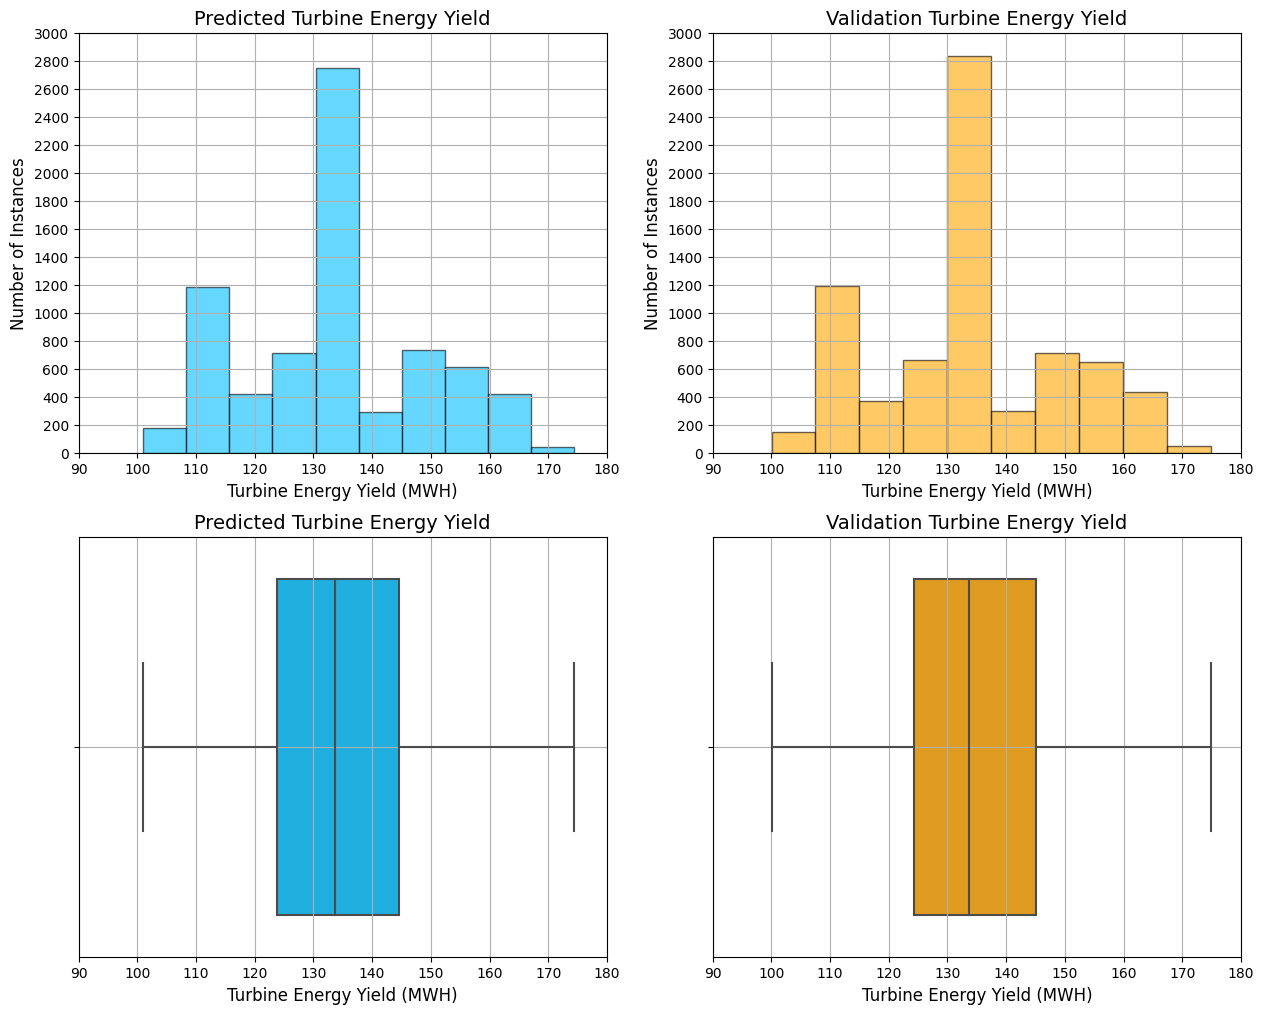

In [35]:
# Display LightGBM prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
lgb_dist = plot_dist(lgb_pred, 'deepskyblue', 0.6, np.arange(90, 190, 10), 
                     np.arange(0, 3200, 200))

# Show subplot
plt.show()


-- Fold: 1 --

R^2 Scoring:
Mean: 0.997810
Std: +/- 0.000033
Min: 0.997736
Max: 0.997851

RMSE Scoring:
Mean: 0.728832
Std: +/- 0.005683
Min: 0.718924
Max: 0.739899


-- Fold: 2 --

R^2 Scoring:
Mean: 0.997874
Std: +/- 0.000046
Min: 0.997777
Max: 0.997980

RMSE Scoring:
Mean: 0.718009
Std: +/- 0.007615
Min: 0.699950
Max: 0.730875


-- Fold: 3 --

R^2 Scoring:
Mean: 0.997893
Std: +/- 0.000042
Min: 0.997816
Max: 0.997983

RMSE Scoring:
Mean: 0.714900
Std: +/- 0.007985
Min: 0.698008
Max: 0.733833


-- Fold: 4 --

R^2 Scoring:
Mean: 0.997908
Std: +/- 0.000056
Min: 0.997766
Max: 0.998036

RMSE Scoring:
Mean: 0.712172
Std: +/- 0.009201
Min: 0.695275
Max: 0.731053


-- Fold: 5 --

R^2 Scoring:
Mean: 0.997912
Std: +/- 0.000061
Min: 0.997772
Max: 0.998108

RMSE Scoring:
Mean: 0.711512
Std: +/- 0.010404
Min: 0.686899
Max: 0.737988


-- Fold: 6 --

R^2 Scoring:
Mean: 0.997918
Std: +/- 0.000067
Min: 0.997723
Max: 0.998099

RMSE Scoring:
Mean: 0.710376
Std: +/- 0.011264
Min: 0.680308
Max: 0.735302

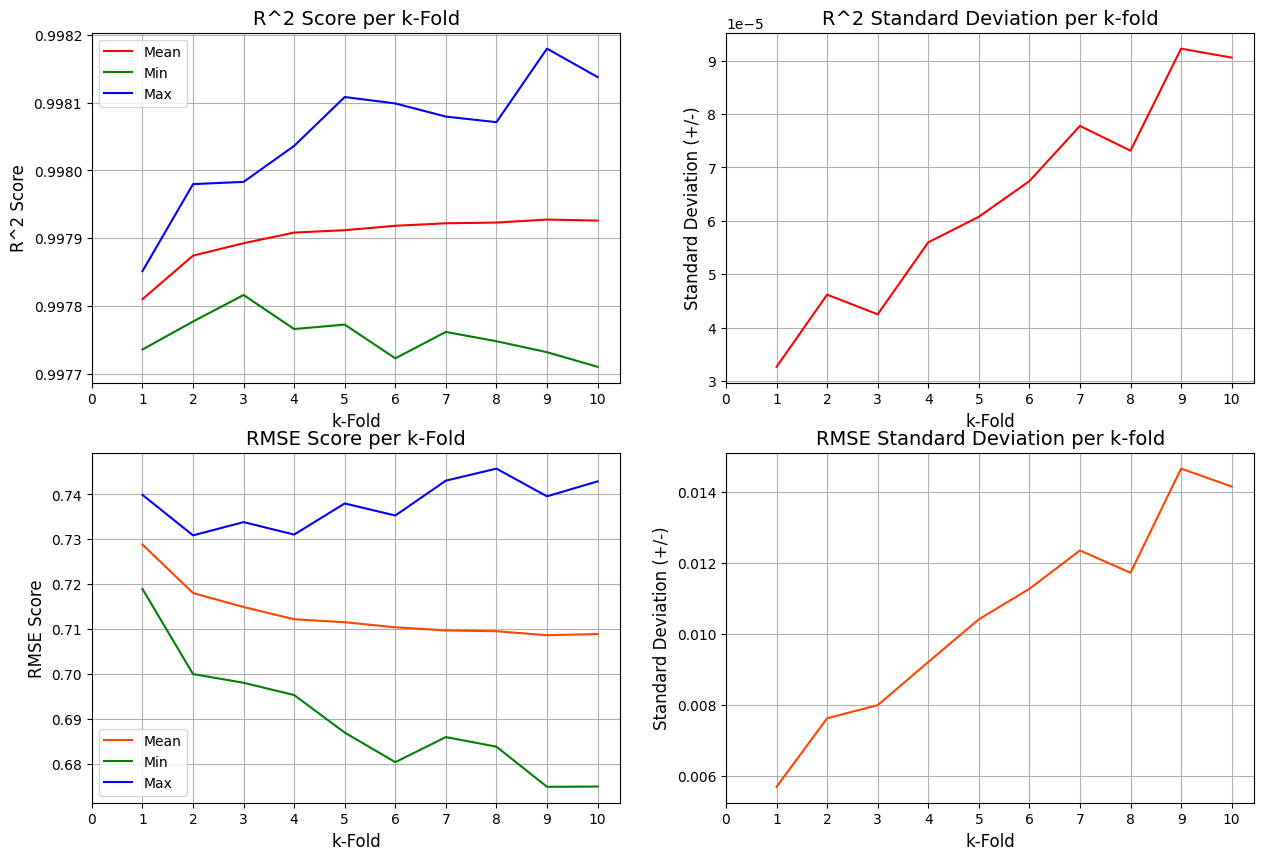

In [36]:
# LightGBM - k-Fold Cross Validation
lgb_cv = k_fold(lgb_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">LightGBM Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.998</td>
      <td>0.709</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.0001</td>
      <td>0.014</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.998</td>
      <td>0.675</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.998</td>
      <td>0.743</td>
    </tr>
  </tbody>
</table>

In [37]:
# Apply Grid Search for parameter tuning

# param_dict = {'max_depth': [2, 4, 6, 8, 10],
#               'n_estimators': [50, 100, 150, 200, 250],
#               'learning_rate': [0.01, 0.05, 0.1, 0.15],
#               'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1],
#               'num_leaves': [1, 5, 10, 20],
#               'min_split_gain': [2, 5, 10],
#               'reg_alpha': [0.5, 1, 1.5, 2, 5, 10],
#               'reg_lambda': [0.5, 1, 1.5, 2, 5, 10],
#               'subsample': [1, 1.5, 2, 5, 10],
#               'subsample_freq': [5, 10, 15, 20, 25],
#               'random_state': [0, 1, 2, 5, 42]}

lgb_params = {'max_depth': [10],
              'n_estimators': [100],
              'random_state': [0]}

# Perform Grid Search
if ((metric == "r2") or (metric == "rmse")):
  # R^2 Score
  lgb_grid_r2 = GridSearchCV(lgb_reg, lgb_params, scoring='r2', 
                              cv=lgb_cv, n_jobs=-1)
  results_r2 = lgb_grid_r2.fit(X_train, y_train)
  # RMSE
  lgb_grid_rmse = GridSearchCV(lgb_reg, lgb_params, 
                                scoring='neg_root_mean_squared_error', 
                                cv=lgb_cv, n_jobs=-1)
  results_rmse = lgb_grid_rmse.fit(X_train, y_train)

  # Summarize results
  best_r2 = lgb_grid_r2.best_score_
  best_rmse = np.abs(lgb_grid_rmse.best_score_)
  # Best scores
  print("Best R^2 Score: %.3f%%" % (best_r2 * 100))
  print("Best RMSE: %.3f" % (best_rmse))

  # Best parameters
  if (metric == "r2"):
    # R^2 Score
    best_parameters = lgb_grid_r2.best_params_
    print("Best Parameters (R^2): ", best_parameters)
  elif (metric == "rmse"):
    # RMSE
    best_parameters = lgb_grid_rmse.best_params_
    print("Best Parameters (RMSE): ", best_parameters)
else:
  # Invalid metric
  print("Invalid scoring metric!")

Best R^2 Score: 99.793%
Best RMSE: 0.709
Best Parameters (R^2):  {'max_depth': 10, 'n_estimators': 100, 'random_state': 0}


<table border = "1">
  <thead>
    <th colspan = "2">LightGBM Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td colspan = "2"><b>Best Score</b></td>
    </tr>
    <tr>
      <td><b>R^2</b></td>
      <td>97.793%</td>
    </tr>
    <tr>
      <td><b>RMSE</b></td>
      <td>0.709</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>10</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>100 (default)</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

### Deep Neural Network (DNN)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                660       
                                                                 
 dense_1 (Dense)             (None, 50)                3050      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,761
Trainable params: 3,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
919/919 [==============================] - 3s 3ms/step - loss: 2511.1323 - val_loss: 136.3342
Epoch 2/100
919/919 [==============================] - 2s 3ms/step - loss: 80.14

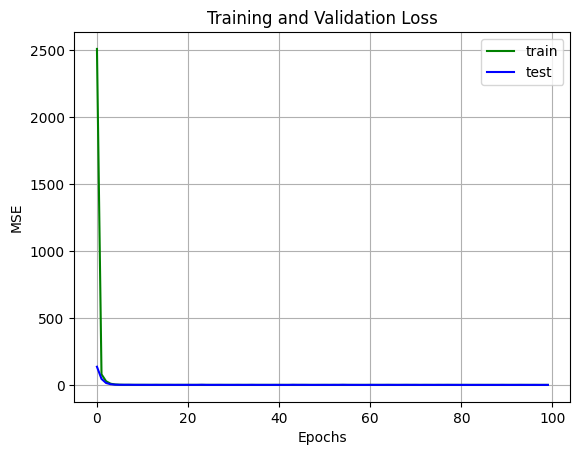

In [38]:
# Define DNN model
dnn_reg = Sequential()

# Input layer and first hidden layer
dnn_reg.add(Dense(units=60, activation='relu', input_dim=X.shape[1]))

# Additional hidden layer(s)
dnn_reg.add(Dense(units=50, activation='relu'))
dnn_reg.add(Dropout(0.00015))
# dnn_reg.add(Dense(units=50, activation='relu'))
# dnn_reg.add(Dropout(0.0002))

# Output layer
dnn_reg.add(Dense(units=1))

# Compile DNN model
dnn_reg.compile(optimizer='adam', loss='mse')

# Summarize DNN model
dnn_reg.summary()

# Train model (and capture results - history)
history = dnn_reg.fit(X_train, y_train, batch_size=32, epochs=100, 
                  validation_data=(X_test, y_test))

# Plot loss during training
plt.plot(history.history['loss'], 'g', label='train')
plt.plot(history.history['val_loss'], 'b', label='test')
# Plot title and labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
# Plot legend and grid
plt.legend()
plt.grid()

# Show loss results
plt.show()

In [39]:
# Predict test set results
dnn_pred = dnn_reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((dnn_pred.reshape(len(dnn_pred), 1), y_test.reshape(len(dnn_pred), 1)), 1 ))
print('')

# Summarize results
summarize_results(dnn_pred)

230/230 [==============================] - 0s 1ms/step
[[127.52 126.81]
 [122.51 122.67]
 [152.21 152.8 ]
 ...
 [132.57 132.22]
 [133.97 132.83]
 [151.77 150.23]]

MAE: 0.568
MSE: 0.551
RMSE: 0.742
R^2 Score: 0.998


<table border = "1">
  <thead>
    <th colspan = "5">DNN Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.568</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>0.551</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>0.742</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.998</td>
    </tr>
  </tbody>
</table>

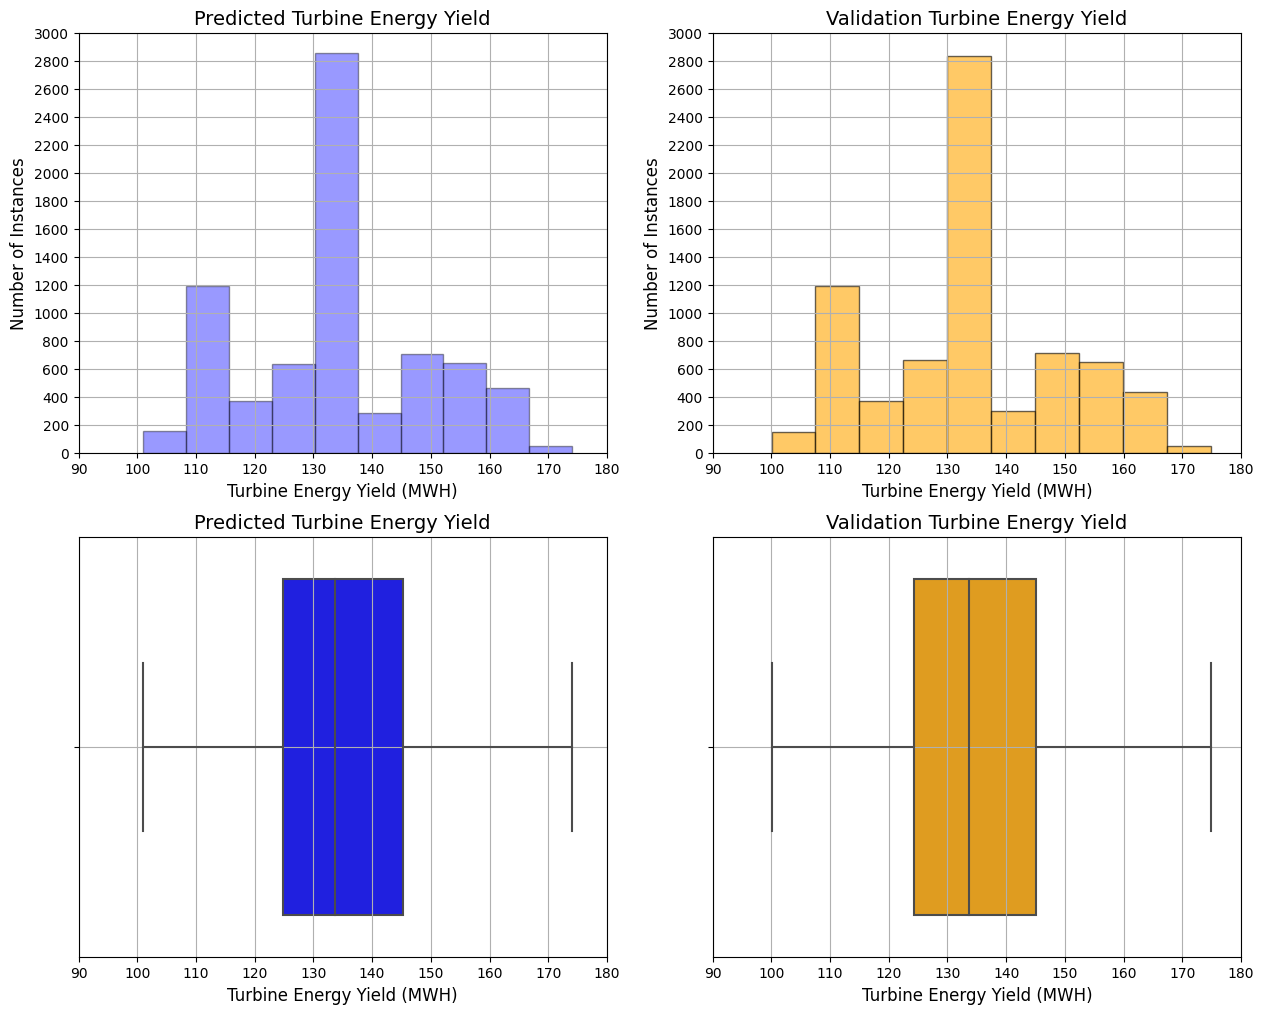

In [40]:
# Display DNN prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
dnn_dist = plot_dist(dnn_pred, 'blue', 0.4, np.arange(90, 190, 10), 
                     np.arange(0, 3200, 200))

# Show subplot
plt.show()

## 4. Final Results

<table border = "1">
  <thead>
    <th colspan = "5">Final Regression Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Model</b></td>
      <td colspan='2'><b>R^2</b></td>
      <td colspan='2'><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b></b></td>
      <td><b>CV</b></td>
      <td><b>Val.</b></td>
      <td><b>CV</b></td>
      <td><b>Val.</b></td>
    </tr> 
    <tr>
      <td><b>Linear Regression (LR)</b></td>
      <td>0.996</td>
      <td>0.996</td>
      <td>0.952</td>
      <td>1.000</td>
    </tr>
    <tr>
      <td><b>Decision Tree (DT)</b></td>
      <td>0.996</td>
      <td>0.996</td>
      <td>0.941</td>
      <td>0.956</td>
    </tr>
    <tr>
      <td><b>LightGBM (LGB)</b></td>
      <td>0.998</td>
      <td>0.998</td>
      <td>0.708</td>
      <td>0.761</td>
    </tr>
    <tr>
      <td><b>Deep Neural Network (DNN)</b></td>
      <td>---</td>
      <td>0.998</td>
      <td>---</td>
      <td>0.742</td>
    </tr>
  </tbody>
</table>

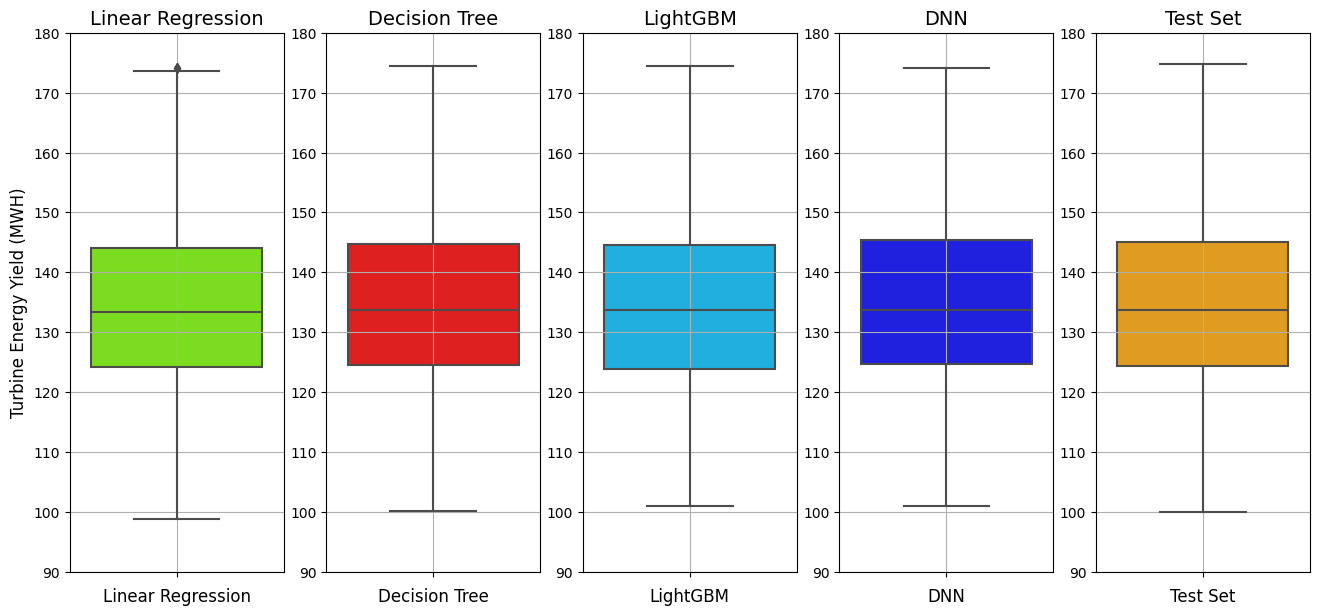

In [41]:
# Combined box plot distributions
box_plots_comb = plt.figure(figsize=(16, 7))

# Box plot for lr_pred
ax1 = box_plots_comb.add_subplot(1, 5, 1)
ax1 = sns.boxplot(y=lr_pred, color='lawngreen', orient='v')
# Adjust Y-Axis Range
plt.yticks(np.arange(90, 190, 10))
# Plot title and labels
plt.xlabel('Linear Regression', fontsize=12)
plt.ylabel('Turbine Energy Yield (MWH)', fontsize=12)
plt.title('Linear Regression', fontsize=14)
# Plot grid
plt.grid(True)

# Box plot for dt_pred
ax2 = box_plots_comb.add_subplot(1, 5, 2)
ax2 = sns.boxplot(y=dt_pred, color='red', orient='v')
# Adjust Y-Axis Range
plt.yticks(np.arange(90, 190, 10))
# Plot title and label
plt.xlabel('Decision Tree', fontsize=12)
plt.title('Decision Tree', fontsize=14)
# Plot grid
plt.grid(True)

# Box plot for lgb_pred
ax3 = box_plots_comb.add_subplot(1, 5, 3)
ax3 = sns.boxplot(y=lgb_pred, color='deepskyblue', orient='v')
# Adjust Y-Axis Range
plt.yticks(np.arange(90, 190, 10))
# Plot title and label
plt.xlabel('LightGBM', fontsize=12)
plt.title('LightGBM', fontsize=14)
# Plot grid
plt.grid(True)

# Box plot for dnn_pred
ax4 = box_plots_comb.add_subplot(1, 5, 4)
ax4 = sns.boxplot(y=dnn_pred, color='blue', orient='v')
# Adjust Y-Axis Range
plt.yticks(np.arange(90, 190, 10))
# Plot title and label
plt.xlabel('DNN', fontsize=12)
plt.title('DNN', fontsize=14)
# Plot grid
plt.grid(True)

# Box plot for y_test
ax5 = box_plots_comb.add_subplot(1, 5, 5)
ax5 = sns.boxplot(y=y_test, color='orange', orient='v')
# Adjust Y-Axis Range
plt.yticks(np.arange(90, 190, 10))
# Plot title and label
plt.xlabel('Test Set', fontsize=12)
plt.title('Test Set', fontsize=14)
# Plot grid
plt.grid(True)

# Show subplot
plt.show()